In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('groceries.csv')


In [7]:
df.head()

,Month,Rice,Wheat,Barley,Corn,Peanuts,Sugar,Coconut-oil,Palm-oil,Sunflower-oil,Chicken,Beef,Pork,Fish,Tea,Coffee
0,Oct-90,0.28,0.11,0.09,0.10,2.12,0.0049,0.28,0.29,0.58,0.0236,0.0571,2.5051,6.35,1.60,1.24
1,Nov-90,0.27,0.11,0.09,0.10,2.11,0.0049,0.34,0.33,0.56,0.0236,0.0558,2.4414,6.46,1.58,1.22
2,Dec-90,0.26,0.11,0.09,0.10,2.00,0.0046,0.32,0.35,0.55,0.0231,0.0562,2.3479,6.50,1.52,1.24
3,Jan-91,0.30,0.11,0.09,0.11,1.85,0.0042,0.34,0.35,0.57,0.0231,0.0571,2.6495,6.34,1.55,1.16
4,Feb-91,0.33,0.11,0.09,0.11,1.79,0.0042,0.33,0.34,0.60,0.0238,0.0602,2.3517,6.41,1.48,1.14


In [8]:
print(df.isna().sum())


Month              0
Rice               0
Wheat              0
Barley             0
Corn               0
Peanuts            0
Sugar              0
Coconut-oil        0
Palm-oil           0
Sunflower-oil    141
Chicken            0
Beef               0
Pork              39
Fish              39
Tea                0
Coffee             0
dtype: int64


In [9]:
for col in ['Fish', 'Tea', 'Coffee']:  
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)


def split_month_year(value):
    month_str, year_suffix = value.split('-')
    months = {
        'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
        'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
        'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    month = months.get(month_str, None)
    year = int('19' + year_suffix) if int(year_suffix) > 50 else int('20' + year_suffix)
    return pd.Series([month, year])

df[['Month_num', 'Year']] = df['Month'].apply(split_month_year)

C:\Users\User\AppData\Local\Temp\ipykernel_26528\1352369798.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [10]:
print(df.head())


    Month  Rice  Wheat  Barley  Corn  Peanuts   Sugar  Coconut-oil  Palm-oil  \
0  Oct-90  0.28   0.11    0.09  0.10     2.12  0.0049         0.28      0.29   
1  Nov-90  0.27   0.11    0.09  0.10     2.11  0.0049         0.34      0.33   
2  Dec-90  0.26   0.11    0.09  0.10     2.00  0.0046         0.32      0.35   
3  Jan-91  0.30   0.11    0.09  0.11     1.85  0.0042         0.34      0.35   
4  Feb-91  0.33   0.11    0.09  0.11     1.79  0.0042         0.33      0.34   

   Sunflower-oil  Chicken    Beef    Pork  Fish   Tea  Coffee  Month_num  Year  
0           0.58   0.0236  0.0571  2.5051  6.35  1.60    1.24         10  1990  
1           0.56   0.0236  0.0558  2.4414  6.46  1.58    1.22         11  1990  
2           0.55   0.0231  0.0562  2.3479  6.50  1.52    1.24         12  1990  
3           0.57   0.0231  0.0571  2.6495  6.34  1.55    1.16          1  1991  
4           0.60   0.0238  0.0602  2.3517  6.41  1.48    1.14          2  1991  


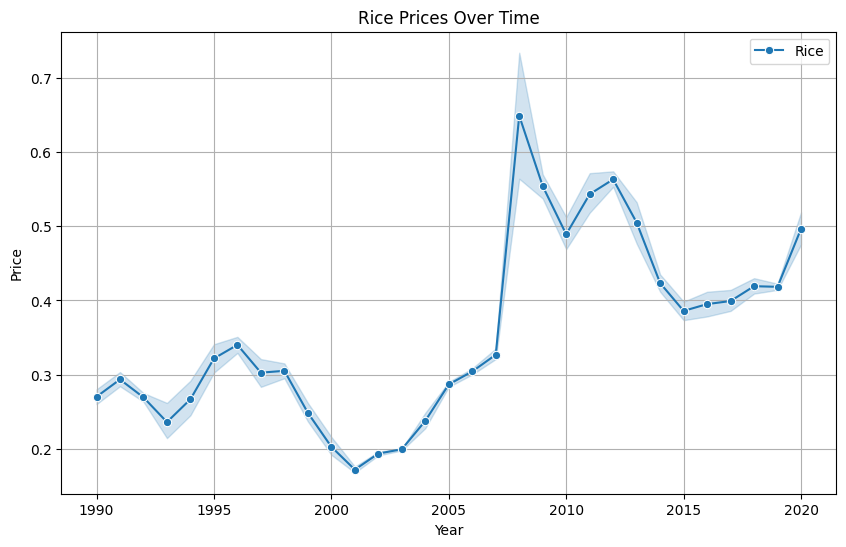

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Rice', marker='o', label='Rice')
plt.title('Rice Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()